In [11]:
import numpy
import math
import astropy
from astropy.coordinates import SkyCoord
from astropy.coordinates import BarycentricTrueEcliptic

freqMax = 10
tFft = 8192
pi = math.pi	
# Porting of the SNAG function pss_optmatp with some vectorization
def ecl_skygrid():
	dopplerNum = 0.000106*tFft*freqMax

	indBet = 1 + 0.01/dopplerNum
	betErr = 1
	bet = -0.999

	i = 0
	while betErr > -bet:
		i = i + 1
		beterr = -bet
		bet = pi/2

		mid = 1
		indBet = indBet - 0.01/dopplerNum
		while bet > 0:
			mid = mid+1
			bet = bet - indBet/(dopplerNum*math.sin(bet))

	mid = mid - 1
	nLats = mid*2-1

	eclLat = numpy.zeros(nLats);
	eclLat[0] = pi/2
	for j in numpy.arange(1,mid-1):
		eclLat[j] = eclLat[j-1] - indBet/(dopplerNum*math.sin(eclLat[j-1]))
		
	secondHalf = -eclLat[:mid-1]
	secondHalf = secondHalf[::-1]
	eclLat[mid:] = secondHalf

	numLon = numpy.ceil( 2*pi * dopplerNum * numpy.cos(eclLat) )
	deltaLon = 360.0 / numLon
	nPoints = numpy.sum(numLon).astype(numpy.int32)

	eclCoord = numpy.zeros((nPoints,5))

	js = numpy.arange(1,nLats-1)
	fase = (js+1 - 2*numpy.floor((js+1)/2))*deltaLon[1:-1]/2

	start = 0
	for j in numpy.arange(1,nLats-1):
		start = numpy.int(start + numLon[j-1])
		end = numpy.int(start + numLon[j])
		k = numpy.arange(0,numLon[j])
		
		eclCoord[start:end,0] = fase[j-1] + k*deltaLon[j]
		eclCoord[start:end,1] = eclLat[j]*180/pi
		eclCoord[start:end,2] = deltaLon[j]
		eclCoord[start:end,3] = eclLat[j-1]*180/pi
		eclCoord[start:end,4] = eclLat[j+1]*180/pi


	eclCoord[0,0] = 180
	eclCoord[0,1] = 90
	eclCoord[0,2] = 360
	eclCoord[0,3] = 90
	eclCoord[0,4] = eclCoord[1,1]

	eclCoord[-1,0] = 180
	eclCoord[-1,1] = -90
	eclCoord[-1,2] = 360
	eclCoord[-1,3] = eclCoord[-2,1]
	eclCoord[-1,4] = -90
	
	return eclCoord

eclGrid = ecl_skygrid()

# Conversion from ecliptic to equatorial
# NB there is a slight difference (~1%) between the equatorial coordinates system used in the SNAG function and the icrs system used in astropy.coordinates
coordToConv = SkyCoord(lon = eclGrid[:,0]*astropy.units.degree, lat = eclGrid[:,1]*astropy.units.degree, frame = 'barycentrictrueecliptic') 





In [12]:
coordToConv.shape

(595,)

In [6]:
from astropy.coordinates import Galactic
galCoord = coordToConv.transform_to('galactic')

In [ ]:
><

In [21]:
bLessp10 = numpy.where(numpy.array(galCoord.b) < 10)
galCoordFilt = galCoord[bLessp10]
bGreatm10 = numpy.where(numpy.array(galCoordFilt.b) >  -10)
galCoordFilt = galCoordFilt[bGreatm10]
#bfilter
galCoordFilt

<SkyCoord (Galactic): (l, b) in deg
    [( 96.55405573,  9.77119685), ( 96.91066323,  9.77663647),
     ( 97.26714827,  9.7876138 ), ..., (278.86760297, -9.90542623),
     (279.22194079, -9.94676786), (279.57562142, -9.99360128)]>

In [20]:
ecLat = coordToConv.lat
ecLon = coordToConv.lon-180*astropy.units.degree

eqCoord = coordToConv.transform_to('icrs')
eqRa = numpy.array(eqCoord.ra)
eqDec = numpy.array(eqCoord.dec)

(595,)


<IPython.core.display.Javascript object>


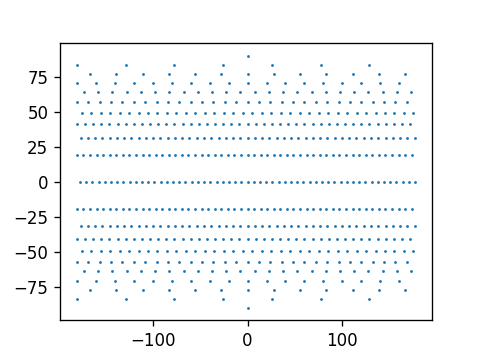

In [21]:
from matplotlib import pyplot
%matplotlib notebook
print(eqCoord.shape)
pyplot.figure(figsize=(4,3))
img = pyplot.scatter(ecLon, ecLat, s = 0.5)

(595,)


<IPython.core.display.Javascript object>


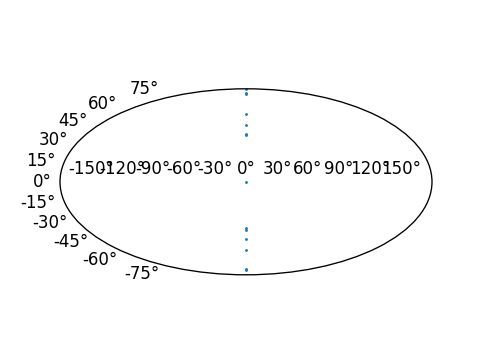

In [23]:
from matplotlib import pyplot
%matplotlib notebook
print(eqCoord.shape)

fig = pyplot.figure(figsize=(4,3))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(ecLon, ecLat, s = 0.5)

In [14]:
import scipy.io
coords_mat = scipy.io.loadmat("/home/larosa/check/2048_MATgrid.mat")['griglia']

print(numpy.nonzero((coords_mat-eclCoord)))



(array([], dtype=int64), array([], dtype=int64))


In [228]:
print(eclCoord[0:10,0])

[180.           0.           0.          51.42857143 102.85714286
 154.28571429 205.71428571 257.14285714 308.57142857  13.84615385]


In [1]:
import numpy as np
import healpy as hp
NSIDE = 7
NPIX = hp.nside2npix(NSIDE)
print(NPIX)


m = np.arange(NPIX)
hp.mollview(m, title="Mollview image RING")
hp.graticule()

588


In [2]:
import healpy as hp

NSIDE = 32
NPIX = hp.nside2npix(NSIDE)
print(NPIX)

12288


192


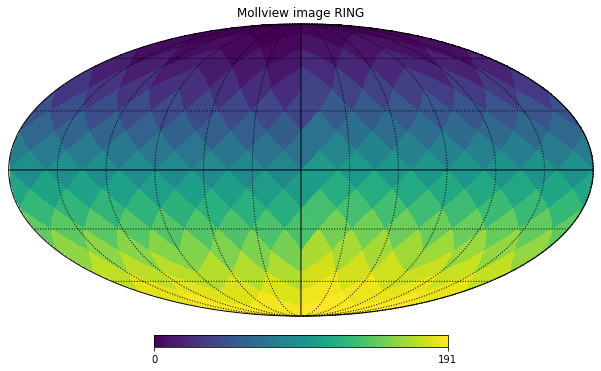

In [10]:
%matplotlib inline
import numpy as np
NSIDE = 4
NPIX = hp.nside2npix(NSIDE)
print(NPIX) 
m = np.arange(NPIX)
hp.mollview(m, title="Mollview image RING")
hp.graticule()